# monan_post

Neste notebook é demonstrada a utilização da biblioteca `intake` para leitura de um catálogo de dados. Os dados lidos representam resultados de avaliações estatísticas geradas pelo SCANTEC e convertidos nos formatos Zarr e CSV. A partir destes dados, foi preparado o arquivo `catalog.yml` que contém as informações dos locais onde estes dados estão armazenados e como devem ser lidos, além de outros metadados.

**Nota:** os dados acessados pelo arquivo de catálogo `catalog.yml` foram preparados pelos notebooks [`01-convert_dataframe_to_cvs.ipynb`](01-convert_dataframe_to_cvs.ipynb) e [`02-convert_dataset_to_zarr.ipynb`](02-convert_dataset_to_zarr.ipynb). O arquivo de catálogo [`catalog.yml`](../data/catalog.yml) foi preparado com o script `create_catalog.sh`. Embora os notebooks 1 e 2 mostrem como os arquivos do catálogo foram tratados, os arquivos que constituem a fonte de dados do catálogo considerado, estão armazenados em um host remoto.

**Referência:** [Using Cloud Computing to Analyze Model Output Archived in Zarr Format](https://journals.ametsoc.org/view/journals/atot/39/4/JTECH-D-21-0106.1.xml).

Nas células a seguir, observe que a instrução `%%time` é utilizada para contabilizar o tempo de execução do comando.

In [1]:
# Para uso no Google Colab, descomente as linhas a seguir:
#!pip install xarray
#!pip install zarr
#!pip install intake
#!pip install intake-xarray
#!pip install requests
#!pip install aiohttp

import intake

In [2]:
%%time

!wget https://raw.githubusercontent.com/monanadmin/monan_post/main/data/catalog.yml

catalog = intake.open_catalog('catalog.yml')

--2023-06-12 11:31:47--  https://raw.githubusercontent.com/monanadmin/monan_post/main/data/catalog.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27505 (27K) [text/plain]
Saving to: ‘catalog.yml.1’

catalog.yml.1       100%[===================>]  26,86K  --.-KB/s    in 0,001s  

2023-06-12 11:31:47 (21,4 MB/s) - ‘catalog.yml.1’ saved [27505/27505]

CPU times: user 124 ms, sys: 28.4 ms, total: 152 ms
Wall time: 330 ms


In [3]:
# Verificação das informações contidas no objeto catalog

catalog

? ''
: args:
    path: catalog.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [4]:
# Listagem das fontes de dados contidas no catálogo
# No exemplo, 'scantec_as_rmse_bamh' representa a informação da Raiz do Erro Quadrático Médio (rmse) do modelo BAM (bamh) sobre a América do Sul (as)
# as demais fontes de dados representam outras informações como Viés (vies) e o Erro Médio Absoluto (mean) sobre diferentes regiões como Globo (gl)
# Trópicos (tr), Hemisfério Norte (hn) e Hemisfério Sul (hs) e diferentes experimentos (dtc e bamh0)

list(catalog)

['scantec_df_bias_rmse_acor_gl',
 'scantec_gl_rmse_dtc',
 'scantec_gl_mean_dtc',
 'scantec_gl_vies_dtc',
 'scantec_hn_rmse_dtc',
 'scantec_hn_mean_dtc',
 'scantec_hn_vies_dtc',
 'scantec_tr_rmse_dtc',
 'scantec_tr_mean_dtc',
 'scantec_tr_vies_dtc',
 'scantec_hs_rmse_dtc',
 'scantec_hs_mean_dtc',
 'scantec_hs_vies_dtc',
 'scantec_as_rmse_dtc',
 'scantec_as_mean_dtc',
 'scantec_as_vies_dtc',
 'scantec_gl_rmse_bamh',
 'scantec_gl_mean_bamh',
 'scantec_gl_vies_bamh',
 'scantec_hn_rmse_bamh',
 'scantec_hn_mean_bamh',
 'scantec_hn_vies_bamh',
 'scantec_tr_rmse_bamh',
 'scantec_tr_mean_bamh',
 'scantec_tr_vies_bamh',
 'scantec_hs_rmse_bamh',
 'scantec_hs_mean_bamh',
 'scantec_hs_vies_bamh',
 'scantec_as_rmse_bamh',
 'scantec_as_mean_bamh',
 'scantec_as_vies_bamh',
 'scantec_gl_rmse_bamh0',
 'scantec_gl_mean_bamh0',
 'scantec_gl_vies_bamh0',
 'scantec_hn_rmse_bamh0',
 'scantec_hn_mean_bamh0',
 'scantec_hn_vies_bamh0',
 'scantec_tr_rmse_bamh0',
 'scantec_tr_mean_bamh0',
 'scantec_tr_vies_bamh0'

In [5]:
# Detalhamento de uma fonte de dados do catálogo
# Observe que urlpath indica o local onde o dado está consolidado e o tipo de dado

catalog['scantec_as_rmse_bamh']

scantec_as_rmse_bamh:
  args:
    consolidated: true
    urlpath: https://s0.cptec.inpe.br/pesquisa/das/dist/carlos.bastarz/MONAN/monan_post/data/RMSEBAMH_20230216002023030300F.zarr
  description: Root Mean Square Error for the BAMH experiment (as area)
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: /home/carlos/Documents/GitHub/monan_post/notebooks/
    tags:
    - atmosphere
    - scantec
    - bam
    - data_assimilation
    url: https://s0.cptec.inpe.br/pesquisa/das/dist/carlos.bastarz/MONAN/monan_post/data/


In [6]:
%%time

# Criação de uma estrutura de dados georeferenciada a partir de uma fonte de dados do catálogo
# Neste caso, utiliza-se o Xarray e o Dask

ds = catalog['scantec_as_rmse_bamh'].to_dask()

CPU times: user 703 ms, sys: 39.1 ms, total: 742 ms
Wall time: 895 ms


In [7]:
# Verificação da estutura de dados criada

ds

<xarray.Dataset>
Dimensions:  (lat: 401, lon: 901, time: 12)
Coordinates:
  * lat      (lat) float32 -80.0 -79.6 -79.2 -78.8 -78.4 ... 78.8 79.2 79.6 80.0
  * lon      (lon) float32 0.0 0.4 0.8 1.2 1.6 ... 358.4 358.8 359.2 359.6 360.0
  * time     (time) datetime64[ns] 2023-02-16 2023-02-17 ... 2023-02-27
Data variables: (12/19)
    pslc000  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    temp250  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    temp500  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    temp850  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    umes500  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    umes850  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    ...       ...
    vvel250  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    vvel500  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    vvel850  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    zgeo250  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    zgeo500  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    zgeo850  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
Attributes:
    comment:  virtual temperatura @ 925 hpa [k]
    pdef:     None
    storage:  99
    title:    
    undef:    -999.9

CPU times: user 81 ms, sys: 7.72 ms, total: 88.7 ms
Wall time: 461 ms


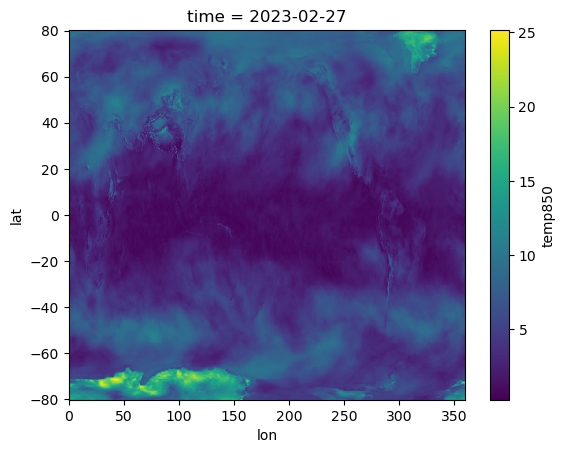

In [8]:
%%time

# Plotagem da variável 'temp850' no último tempo do dataset (estrutura de dados armazenada no objeto ds)

ds['temp850'].isel(time=-1).plot()

In [9]:
# Diferente da fonte de dados 'scantec_as_rmse_bamh', a fonte de dados 'scantec_df_bias_rmse_acor_gl' contém informações tabuladas
# de viés, raiz do erro quadrático médio e correlação de anomalias para todos os experimentos do exemplo (dtc, bamh e bamh0)

catalog['scantec_df_bias_rmse_acor_gl']

scantec_df_bias_rmse_acor_gl:
  args:
    urlpath: https://s0.cptec.inpe.br/pesquisa/das/dist/carlos.bastarz/MONAN/monan_post/data/scantec_df_T1_gl.csv
  description: Bias, Root Mean Square Error and Anomaly Correlation for the DTC experiment
    (average gl area)
  driver: intake.source.csv.CSVSource
  metadata:
    catalog_dir: /home/carlos/Documents/GitHub/monan_post/notebooks/
    tags:
    - atmosphere
    - scantec
    - bam
    - data_assimilation
    url: https://s0.cptec.inpe.br/pesquisa/das/dist/carlos.bastarz/MONAN/monan_post/data/


In [10]:
# Criação de uma estrutura de dados tabular a partir de uma fonte de dados do catálogo
# Neste caso, utiliza-se o Pandas

df = catalog['scantec_df_bias_rmse_acor_gl'].read()

In [11]:
# Verificação da estutura de dados criada

df

,Unnamed: 0,Unnamed: 1,%Previsao,vtmp:925,vtmp:850,vtmp:500,temp:850,temp:500,temp:250,pslc:000,...,umes:500,zgeo:850,zgeo:500,zgeo:250,uvel:850,uvel:500,uvel:250,vvel:850,vvel:500,vvel:250
0,VIESDTC_20230216002023030300T.scan,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,VIESDTC_20230216002023030300T.scan,1,24,-0.057,-0.156,-0.005,-0.163,-0.010,-0.116,-0.165,...,0.000,-1.086,-3.093,-4.080,-0.018,-0.008,-0.079,-0.011,0.025,-0.085
2,VIESDTC_20230216002023030300T.scan,2,48,-0.097,-0.264,0.003,-0.277,-0.005,-0.182,-0.326,...,0.000,-2.061,-5.221,-5.909,-0.032,-0.022,-0.068,0.021,-0.026,-0.040
3,VIESDTC_20230216002023030300T.scan,3,72,-0.114,-0.328,-0.009,-0.347,-0.018,-0.303,-0.413,...,0.000,-2.616,-6.759,-8.192,-0.008,-0.014,-0.052,0.062,-0.018,-0.106
4,VIESDTC_20230216002023030300T.scan,4,96,-0.140,-0.373,-0.039,-0.395,-0.050,-0.444,-0.463,...,0.000,-2.932,-7.859,-10.627,-0.061,-0.060,-0.046,0.040,0.014,-0.138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,ACORX666_20230216002023030300T.scan,7,168,-0.017,0.162,0.526,0.161,0.526,0.538,0.986,...,0.231,0.581,0.564,0.672,0.365,0.571,0.666,0.351,0.431,0.556
140,ACORX666_20230216002023030300T.scan,8,192,-0.055,0.153,0.438,0.152,0.438,0.412,0.986,...,0.247,0.552,0.475,0.582,0.422,0.473,0.598,0.437,0.311,0.477
141,ACORX666_20230216002023030300T.scan,9,216,-0.043,0.259,0.373,0.258,0.373,0.507,0.983,...,0.185,0.540,0.494,0.542,0.435,0.410,0.508,0.377,0.377,0.448
142,ACORX666_20230216002023030300T.scan,10,240,-0.109,0.057,0.244,0.056,0.244,0.239,0.980,...,0.034,0.537,0.486,0.550,0.347,0.354,0.475,0.348,0.354,0.413


In [12]:
# Seleção da tabela de estatística viés do experimento dtc para o período 2023021600-2023030300

df.loc[df['Unnamed: 0'] == 'VIESDTC_20230216002023030300T.scan']

,Unnamed: 0,Unnamed: 1,%Previsao,vtmp:925,vtmp:850,vtmp:500,temp:850,temp:500,temp:250,pslc:000,...,umes:500,zgeo:850,zgeo:500,zgeo:250,uvel:850,uvel:500,uvel:250,vvel:850,vvel:500,vvel:250
0,VIESDTC_20230216002023030300T.scan,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,VIESDTC_20230216002023030300T.scan,1,24,-0.057,-0.156,-0.005,-0.163,-0.010,-0.116,-0.165,...,0.0,-1.086,-3.093,-4.080,-0.018,-0.008,-0.079,-0.011,0.025,-0.085
2,VIESDTC_20230216002023030300T.scan,2,48,-0.097,-0.264,0.003,-0.277,-0.005,-0.182,-0.326,...,0.0,-2.061,-5.221,-5.909,-0.032,-0.022,-0.068,0.021,-0.026,-0.040
3,VIESDTC_20230216002023030300T.scan,3,72,-0.114,-0.328,-0.009,-0.347,-0.018,-0.303,-0.413,...,0.0,-2.616,-6.759,-8.192,-0.008,-0.014,-0.052,0.062,-0.018,-0.106
4,VIESDTC_20230216002023030300T.scan,4,96,-0.140,-0.373,-0.039,-0.395,-0.050,-0.444,-0.463,...,0.0,-2.932,-7.859,-10.627,-0.061,-0.060,-0.046,0.040,0.014,-0.138
5,VIESDTC_20230216002023030300T.scan,5,120,-0.148,-0.399,-0.096,-0.425,-0.107,-0.579,-0.503,...,0.0,-3.272,-9.085,-13.490,-0.068,-0.101,0.002,0.041,0.039,-0.180
6,VIESDTC_20230216002023030300T.scan,6,144,-0.174,-0.453,-0.182,-0.480,-0.194,-0.678,-0.542,...,0.0,-3.657,-10.621,-16.929,-0.037,-0.061,0.074,0.064,0.018,-0.138
7,VIESDTC_20230216002023030300T.scan,7,168,-0.204,-0.521,-0.264,-0.550,-0.275,-0.699,-0.613,...,0.0,-4.433,-12.764,-20.079,0.060,-0.002,0.195,0.072,0.028,-0.162
8,VIESDTC_20230216002023030300T.scan,8,192,-0.252,-0.595,-0.326,-0.625,-0.338,-0.715,-0.720,...,0.0,-5.348,-14.797,-22.782,0.086,0.021,0.259,0.046,0.039,-0.132
9,VIESDTC_20230216002023030300T.scan,9,216,-0.315,-0.664,-0.362,-0.694,-0.375,-0.739,-0.787,...,0.0,-5.985,-16.135,-24.207,0.077,-0.002,0.238,0.047,0.042,-0.102


In [13]:
# Seleção da coluna da variável 'temp:850'

df.loc[df['Unnamed: 0'] == 'VIESDTC_20230216002023030300T.scan'].loc[:,'temp:850']

0     0.000
1    -0.163
2    -0.277
3    -0.347
4    -0.395
5    -0.425
6    -0.480
7    -0.550
8    -0.625
9    -0.694
10   -0.752
11   -0.776
Name: temp:850, dtype: float64

<AxesSubplot:>

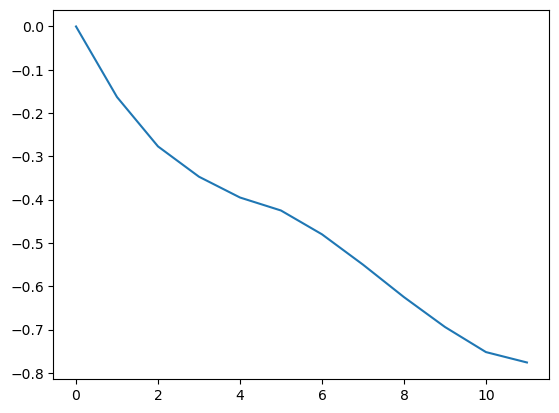

In [14]:
# Plotagem da curva referente ao viés sobre toda a região do globo da temperatura em 850 hPa do experimento dtc, válido para 2023021600-2023030300

df.loc[df['Unnamed: 0'] == 'VIESDTC_20230216002023030300T.scan'].loc[:,'temp:850'].plot()